In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/use_baby.csv',index_col=['updated'])
df.index = pd.to_datetime(df.index)
df

,device_id,days,sex,temperature
updated,,,,
2023-05-08 07:59:00,2290.0,918.0,0.0,39.03
2023-05-08 08:00:00,2290.0,918.0,0.0,39.06
2023-05-08 08:01:00,2290.0,918.0,0.0,39.08
2023-05-08 08:02:00,2290.0,918.0,0.0,39.11
2023-05-08 08:03:00,2290.0,918.0,0.0,39.20
...,...,...,...,...
2023-08-22 10:34:00,1416.0,NaN,NaN,NaN
2023-08-22 10:35:00,1416.0,NaN,NaN,NaN
2023-08-22 10:36:00,1416.0,NaN,NaN,NaN


In [6]:
df.describe()

,device_id,days,sex,temperature
count,3.565799e+06,732803.000000,732803.000000,732803.000000
mean,1.974254e+03,610.886424,0.370959,33.028394
std,5.675788e+02,486.800692,0.483265,355.017211
min,3.570000e+02,-353.000000,-1.000000,-1.000000
25%,1.702000e+03,138.000000,0.000000,29.640000
50%,2.220000e+03,803.000000,0.000000,31.260000
75%,2.372000e+03,1000.000000,1.000000,34.600000
max,2.552000e+03,29459.681818,1.000000,167718.140000


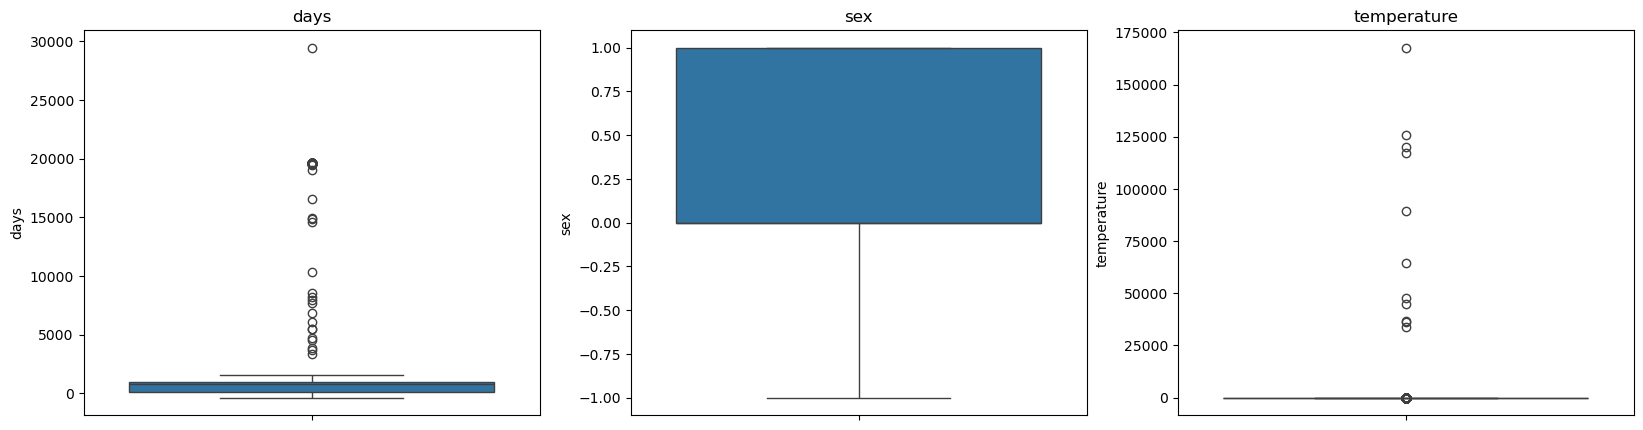

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.boxplot(df['days'], ax=axes[0])
axes[0].set_title('days')

sns.boxplot(df['sex'], ax=axes[1])
axes[1].set_title('sex')

sns.boxplot(df['temperature'], ax=axes[2])
axes[2].set_title('temperature')

plt.show()


1) 날짜 데이터 전처리

<Axes: ylabel='days'>

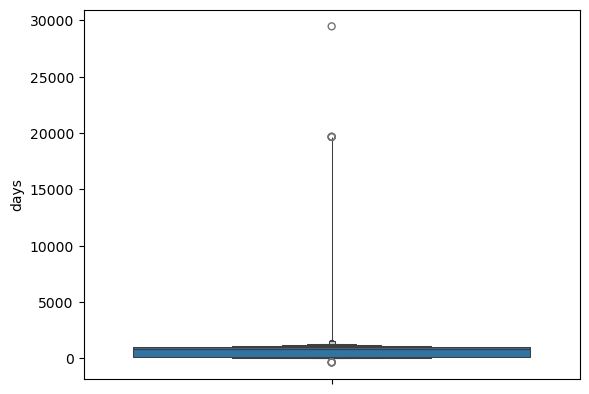

In [7]:
import seaborn as sns

sns.boxenplot(df['days'])

updated
2023-05-08 07:59:00     918.0
2023-05-08 08:00:00     918.0
2023-05-08 08:01:00     918.0
2023-05-08 08:02:00     918.0
2023-05-08 08:03:00     918.0
                        ...  
2023-08-11 13:48:00    1593.0
2023-08-11 13:49:00    1593.0
2023-08-14 23:12:00    1596.0
2023-08-22 10:37:00    1604.0
2023-08-22 10:38:00    1604.0
Name: days, Length: 732803, dtype: float64

<Axes: xlabel='days', ylabel='Count'>

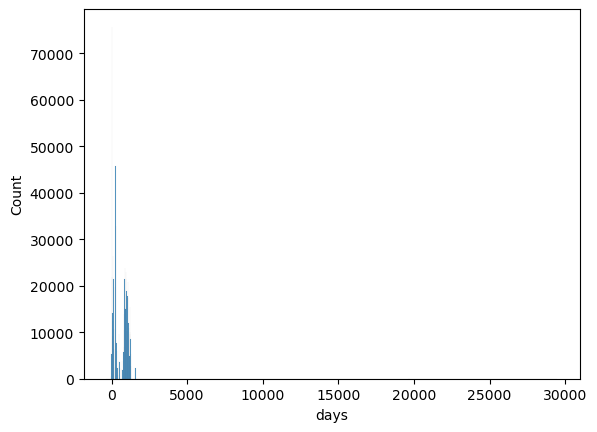

In [20]:
import seaborn as sns


sns.histplot(df['days'].dropna().apply(lambda x:int(x)))

In [21]:
df['days'].count()

732803

<Axes: xlabel='days', ylabel='Count'>

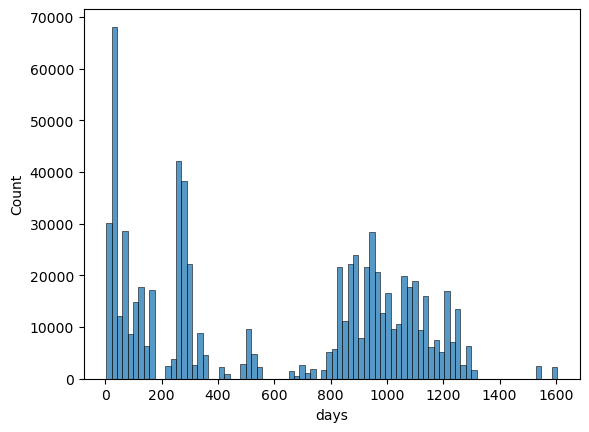

In [23]:
sns.histplot(df['days'].dropna().apply(lambda x:int(x)))

In [24]:
df['days'].count()

732071

In [4]:
sorted(df['days'].value_counts().index.to_list())

[-353.0,
 -32.0,
 -31.0,
 -30.75,
 -29.0,
 -28.0,
 -27.0,
 -25.0,
 -16.0,
 -15.666666666666666,
 -15.0,
 -14.0,
 -6.0,
 -5.909090909090909,
 -5.0,
 -1.0,
 3.0,
 3.183333333333333,
 4.0,
 4.183333333333334,
 4.25,
 5.0,
 9.0,
 10.0,
 12.0,
 12.066666666666666,
 13.0,
 13.083333333333334,
 14.0,
 14.15,
 15.0,
 15.033333333333331,
 16.0,
 16.05,
 16.25,
 17.0,
 17.15,
 18.0,
 18.416666666666668,
 19.0,
 19.03333333333333,
 20.0,
 20.25,
 20.38095238095238,
 20.433333333333334,
 21.0,
 21.06779661016949,
 21.5,
 22.0,
 22.183333333333334,
 22.25,
 22.466666666666665,
 22.48333333333333,
 23.0,
 23.03333333333333,
 23.066666666666663,
 23.266666666666666,
 23.53333333333333,
 24.0,
 24.033898305084747,
 24.133333333333333,
 24.204545454545453,
 24.216666666666665,
 24.433333333333334,
 25.0,
 25.03333333333333,
 25.20338983050848,
 25.216666666666665,
 25.3,
 25.36,
 25.361702127659573,
 25.366666666666667,
 25.416666666666668,
 26.0,
 26.1,
 26.23333333333333,
 26.25,
 26.383333333333333,

In [26]:
df = df[(df['days'] < 1800) & (df['days'] > 0)]

<Axes: ylabel='days'>

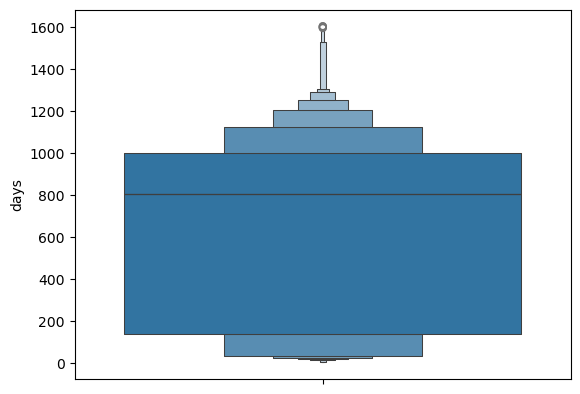

In [6]:
sns.boxenplot(df['days'])

2) 성별 데이터 전처리

In [7]:
df['sex'].value_counts()

sex
 0.000000    460798
 1.000000    271271
 0.833333         1
-0.050000         1
Name: count, dtype: int64

In [27]:
df = df[(df['sex'] == 0) | (df['sex'] == 1)]

In [9]:
df

,device_id,days,sex,temperature
updated,,,,
2023-05-08 07:59:00,2290.0,918.0,0.0,39.03
2023-05-08 08:00:00,2290.0,918.0,0.0,39.06
2023-05-08 08:01:00,2290.0,918.0,0.0,39.08
2023-05-08 08:02:00,2290.0,918.0,0.0,39.11
2023-05-08 08:03:00,2290.0,918.0,0.0,39.20
...,...,...,...,...
2023-08-11 13:48:00,1416.0,1593.0,1.0,27.86
2023-08-11 13:49:00,1416.0,1593.0,1.0,27.56
2023-08-14 23:12:00,1416.0,1596.0,1.0,15.94


3) 온도 데이터 전처리
- 20~45도로 고정

In [28]:
df = df[(df['temperature'] >= 15) & (df['temperature'] <= 45)]

- 산점도 확인

<Figure size 1000x1000 with 0 Axes>

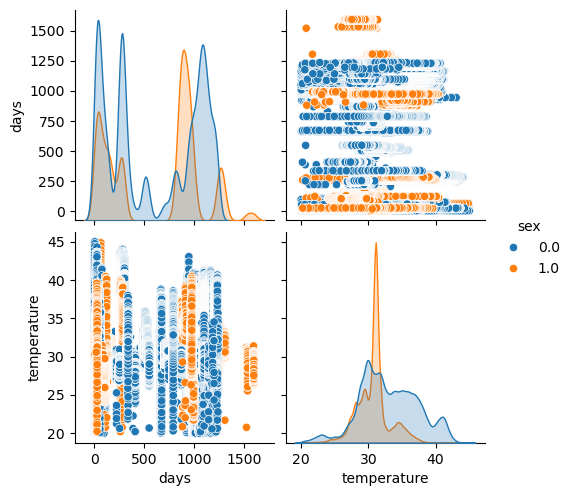

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
sns.pairplot(df[['days','temperature','sex']], hue='sex')
plt.show()

In [6]:
df

,device_id,days,sex,temperature
updated,,,,
2023-05-08 07:59:00,2290.0,918.0,0.0,39.03
2023-05-08 08:00:00,2290.0,918.0,0.0,39.06
2023-05-08 08:01:00,2290.0,918.0,0.0,39.08
2023-05-08 08:02:00,2290.0,918.0,0.0,39.11
2023-05-08 08:03:00,2290.0,918.0,0.0,39.20
...,...,...,...,...
2023-08-11 13:45:00,1416.0,1593.0,1.0,27.90
2023-08-11 13:46:00,1416.0,1593.0,1.0,27.90
2023-08-11 13:47:00,1416.0,1593.0,1.0,27.39


### 적절한 군집 수 찾기

c:\Users\a\anaconda3\envs\monit\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\a\anaconda3\envs\monit\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\a\anaconda3\envs\monit\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\a\anaconda3\envs\monit\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

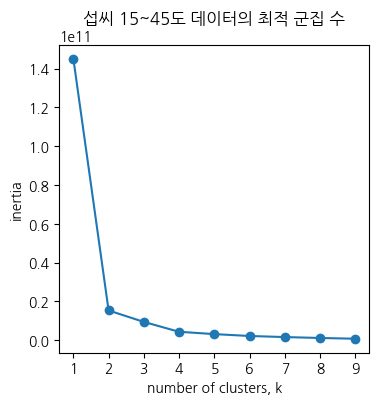

In [30]:
from sklearn.cluster import KMeans

clust_df = df[['days','sex','temperature']]

ks = range(1,10)
inertias = []

for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(clust_df)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('섭씨 15~45도 데이터의 최적 군집 수')
plt.show()

c:\Users\a\anaconda3\envs\monit\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\a\anaconda3\envs\monit\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\a\anaconda3\envs\monit\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


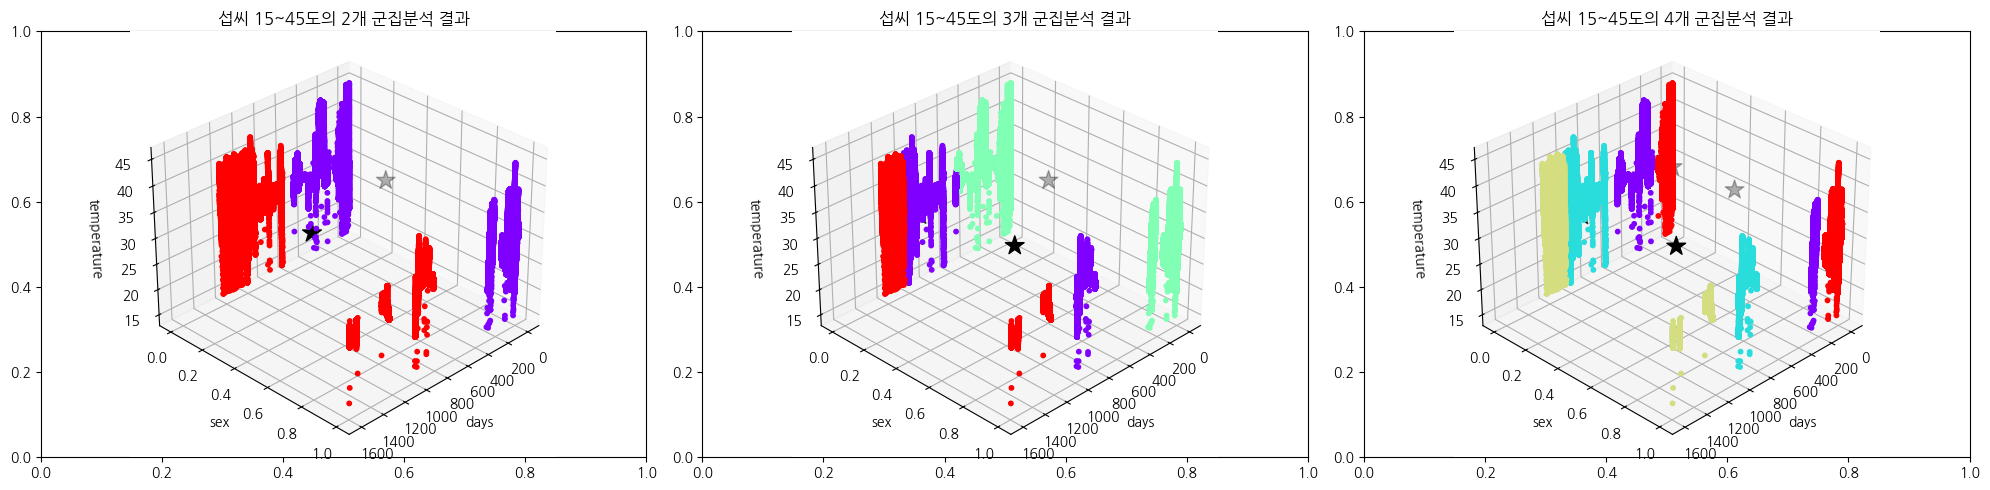

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns


fig, axes = plt.subplots(1,3, figsize=(20,5))
clust_df = df[['days','sex','temperature']]

for i in range(2,5):
    
    # 클러스터 모델 생성 파라미터는 원할 경우 추가
    clust_model = KMeans(n_clusters = i # 클러스터 갯수
                        , n_init=100 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
                        , max_iter=1000 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
                        , random_state = 42
                        , algorithm='auto'
                        )

    # 생성한 모델로 데이터를 학습시킴
    clust_model.fit(clust_df) # unsupervised learning 

    # 결과 값을 변수에 저장
    centers = clust_model.cluster_centers_ # 각 군집의 중심점
    pred = clust_model.predict(clust_df) # 각 예측군집
    
    clust_df['clust'] = pred
    
    ax = fig.add_subplot(1, 3, i - 1, projection='3d')
    
    X = clust_df

    # 데이터 scatterplot
    ax.scatter(X.iloc[:,0]
            , X.iloc[:,1]
            , X.iloc[:,2]
            , c = X.clust
            , s = 10
            , cmap = "rainbow"
            , alpha = 1
            )

    # centroid scatterplot
    ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')

    # 시각화 각도 설정
    ax.view_init(elev=30, azim=45)

    # 제목 설정
    ax.set_title(f'섭씨 15~45도의 {i}개 군집분석 결과')

    # 축 레이블 추가
    ax.set_xlabel('days')
    ax.set_ylabel('sex')
    ax.set_zlabel('temperature')

plt.tight_layout()
plt.show()

### Kmeans 군집분석

1) 2개로 분리

In [10]:
# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 2 # 클러스터 갯수
                      , n_init=100 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
                     , max_iter=1000 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
                     , random_state = 42
                     , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(clust_df) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(clust_df) # 각 예측군집

c:\Users\a\anaconda3\envs\monit\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [11]:
pd.DataFrame(centers)

,0,1,2
0,167.892620,0.326662,32.309222
1,1014.802763,0.418621,31.976725


In [12]:
clust_df['clust'] = pred
clust_df

,days,sex,temperature,clust
updated,,,,
2023-05-08 07:59:00,918.0,0.0,39.03,1
2023-05-08 08:00:00,918.0,0.0,39.06,1
2023-05-08 08:01:00,918.0,0.0,39.08,1
2023-05-08 08:02:00,918.0,0.0,39.11,1
2023-05-08 08:03:00,918.0,0.0,39.20,1
...,...,...,...,...
2023-08-11 13:45:00,1593.0,1.0,27.90,1
2023-08-11 13:46:00,1593.0,1.0,27.90,1
2023-08-11 13:47:00,1593.0,1.0,27.39,1


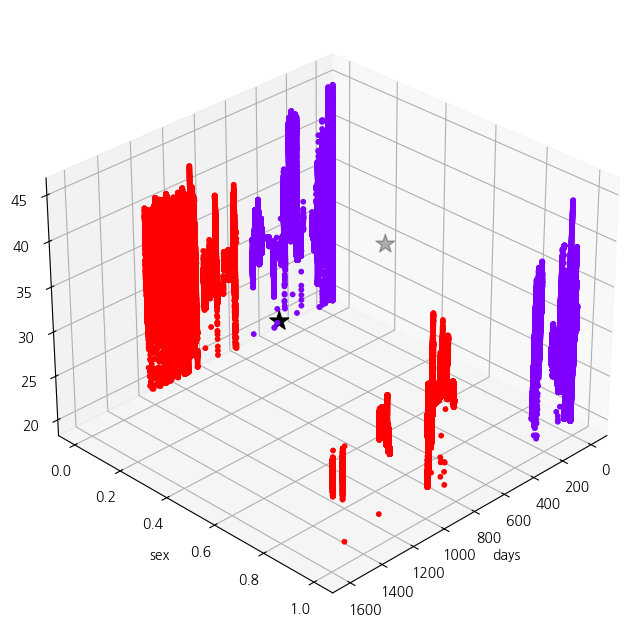

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')

# 시각화 각도 설정
ax.view_init(elev=30, azim=45)

# 축 레이블 추가
ax.set_xlabel('days')
ax.set_ylabel('sex')
ax.set_zlabel('temperature')

plt.show()

In [14]:
clust_df['clust'].value_counts()

clust
1    377860
0    345072
Name: count, dtype: int64

In [16]:
df['clust'] = pred

df_one = df[df['days']<600]
df_two = df[df['days']>=600]

In [31]:
len(df_one['device_id'].unique()), len(df_two['device_id'].unique())

(17, 14)

In [21]:
len(df['device_id'].value_counts())

28

In [27]:
len(df_one), len(df_two)

(345072, 377860)

In [30]:
len(df_one['temperature'].value_counts()), len(df_two['temperature'].value_counts())

(2442, 2150)

In [31]:
print(2729-2442)
print(3079-2150)

287
929


2) 3개로 분류

In [40]:
clust_df2 = clust_df.copy()

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수
                      , n_init=100 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
                     , max_iter=1000 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
                     , random_state = 42
                     , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(clust_df2) # unsupervised learning 

# 결과 값을 변수에 저장
centers2 = clust_model.cluster_centers_ # 각 군집의 중심점
pred2 = clust_model.predict(clust_df2) # 각 예측군집

c:\Users\a\anaconda3\envs\monit\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [41]:
pd.DataFrame(centers2)

,0,1,2
0,163.197338,0.330774,32.340037
1,897.877429,0.586772,31.124528
2,1156.304674,0.186538,33.042807


In [42]:
clust_df2['clust'] = pred2
clust_df2

,days,sex,temperature,clust
updated,,,,
2023-05-08 07:59:00,918.0,0.0,39.03,1
2023-05-08 08:00:00,918.0,0.0,39.06,1
2023-05-08 08:01:00,918.0,0.0,39.08,1
2023-05-08 08:02:00,918.0,0.0,39.11,1
2023-05-08 08:03:00,918.0,0.0,39.20,1
...,...,...,...,...
2023-08-11 13:45:00,1593.0,1.0,27.90,2
2023-08-11 13:46:00,1593.0,1.0,27.90,2
2023-08-11 13:47:00,1593.0,1.0,27.39,2


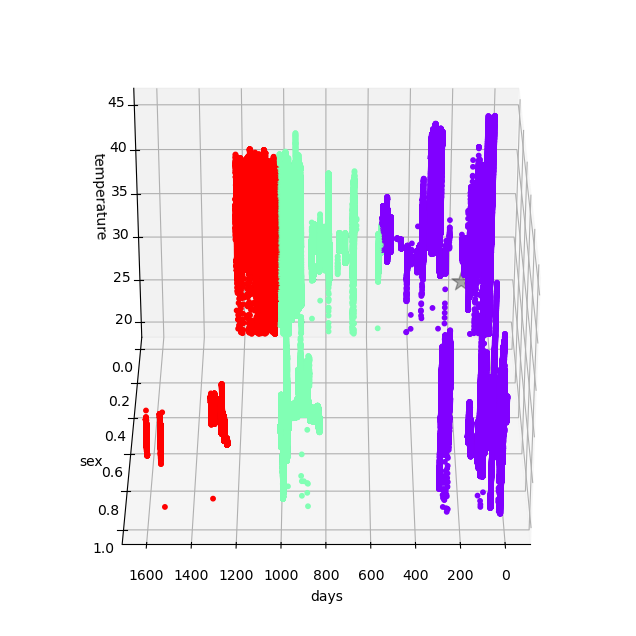

In [43]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df2

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')

# 시각화 각도 설정
ax.view_init(elev=30, azim=90)

# 축 레이블 추가
ax.set_xlabel('days')
ax.set_ylabel('sex')
ax.set_zlabel('temperature')

plt.show()

In [44]:
clust_df2['clust'].value_counts()

clust
0    340783
1    217081
2    165068
Name: count, dtype: int64

- 4개로 분류

In [45]:
clust_df2 = clust_df.copy()

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 4 # 클러스터 갯수
                      , n_init=100 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
                     , max_iter=1000 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
                     , random_state = 42
                     , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(clust_df2) # unsupervised learning 

# 결과 값을 변수에 저장
centers2 = clust_model.cluster_centers_ # 각 군집의 중심점
pred2 = clust_model.predict(clust_df2) # 각 예측군집

c:\Users\a\anaconda3\envs\monit\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [46]:
pd.DataFrame(centers2)

,0,1,2
0,905.972106,0.594266,31.165614
1,65.966285,0.418220,30.875070
2,313.799006,0.195599,34.362193
3,1157.505871,0.188307,33.040286


In [47]:
clust_df2['clust'] = pred2
clust_df2

,days,sex,temperature,clust
updated,,,,
2023-05-08 07:59:00,918.0,0.0,39.03,0
2023-05-08 08:00:00,918.0,0.0,39.06,0
2023-05-08 08:01:00,918.0,0.0,39.08,0
2023-05-08 08:02:00,918.0,0.0,39.11,0
2023-05-08 08:03:00,918.0,0.0,39.20,0
...,...,...,...,...
2023-08-11 13:45:00,1593.0,1.0,27.90,3
2023-08-11 13:46:00,1593.0,1.0,27.90,3
2023-08-11 13:47:00,1593.0,1.0,27.39,3


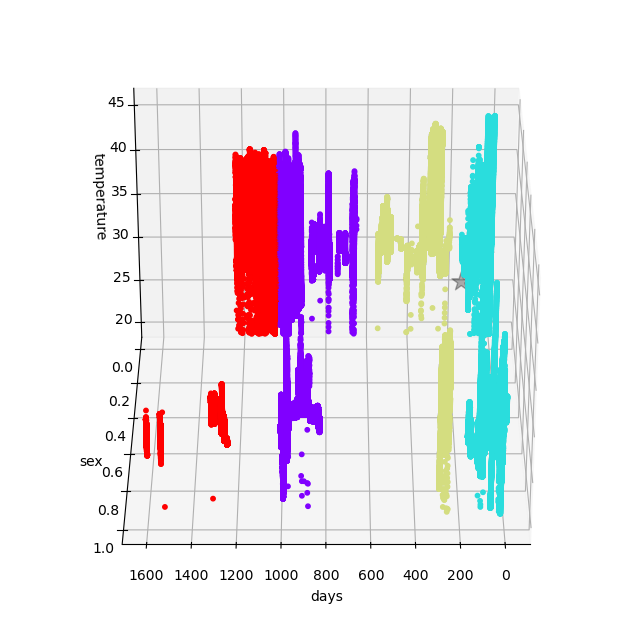

In [48]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df2

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')

# 시각화 각도 설정
ax.view_init(elev=30, azim=90)

# 축 레이블 추가
ax.set_xlabel('days')
ax.set_ylabel('sex')
ax.set_zlabel('temperature')

plt.show()

In [49]:
clust_df2['clust'].value_counts()

clust
0    214353
1    203154
3    163507
2    141918
Name: count, dtype: int64